In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [ ]:
# Step 1: Create a simple dataset
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

In [ ]:
# Step 2: Fit the model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

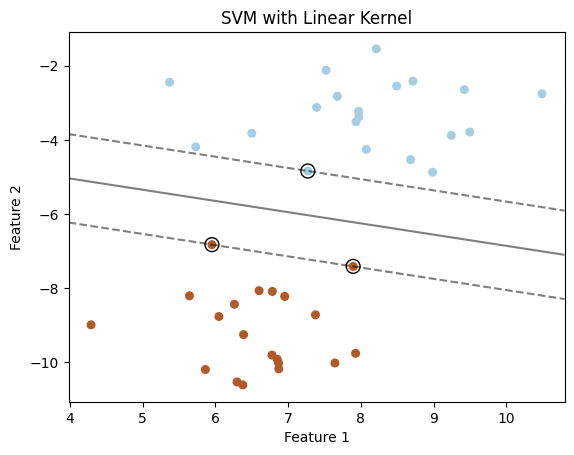

In [ ]:
# Step 3: Plotting the data points and the separating hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlight the support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Linear Kernel')
plt.show()


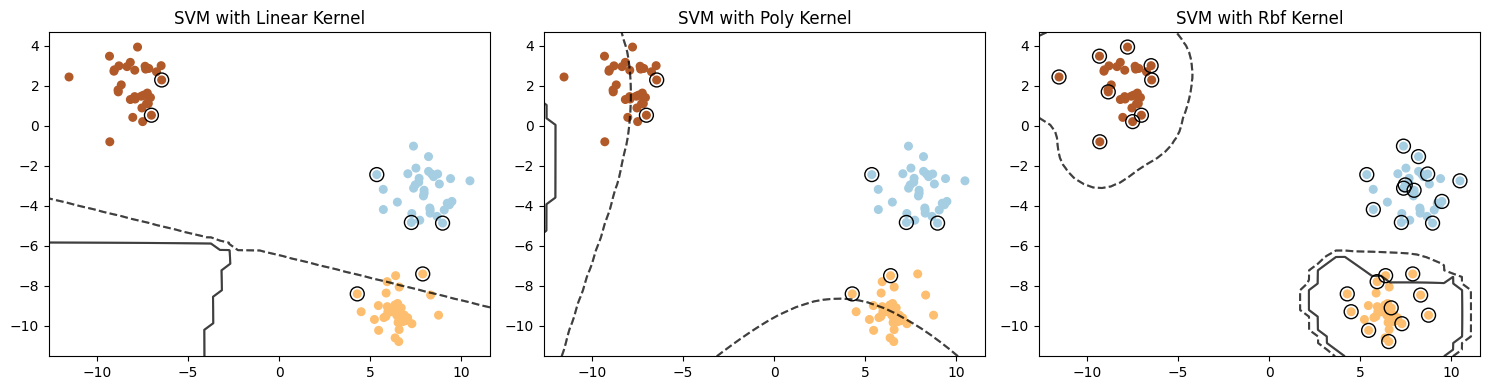

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Step 1: Create a more complex dataset
X, y = make_blobs(n_samples=100, centers=3, random_state=6)

# Kernels to be used
kernels = ['linear', 'poly', 'rbf']

# Plotting setup
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Step 2: Fit the model using different kernels and plot
for kernel, ax in zip(kernels, axes):
    # Create an SVM with the specified kernel
    clf = svm.SVC(kernel=kernel, C=10, gamma='auto')
    clf.fit(X, y)

    # Plotting the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Create grid to evaluate model
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)

    # Evaluate the decision function for each point in the grid
    Z = np.zeros(XX.shape)
    for i in range(XX.shape[0]):
        for j in range(XX.shape[1]):
            # Get the decision function value for a single point
            decision_value = clf.decision_function(np.array([[XX[i, j], YY[i, j]]]))

            # Flatten the decision_value and extract the first element
            Z[i, j] = decision_value.flatten()[0]

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])


    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Highlight the support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(f'SVM with {kernel.capitalize()} Kernel')

plt.tight_layout()
plt.show()


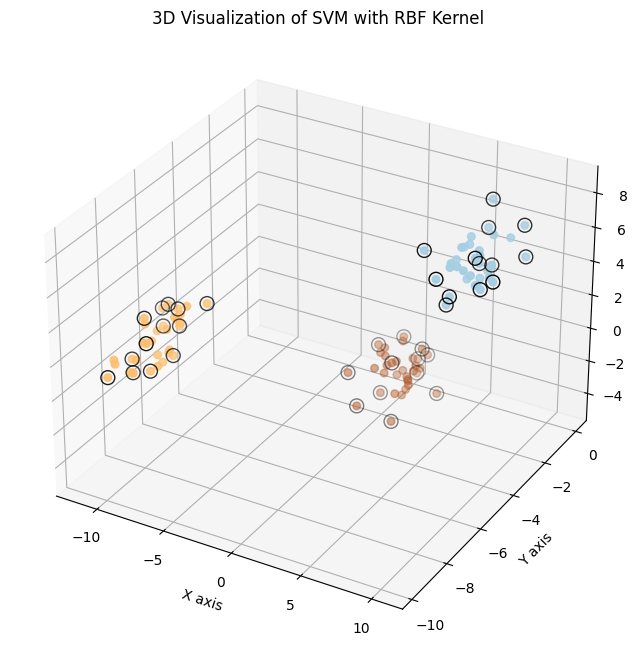

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Create a more complex dataset with 3 features for 3D visualization
X, y = make_blobs(n_samples=100, centers=3, random_state=6, n_features=3)

# Create an SVM with the RBF kernel
clf = svm.SVC(kernel='rbf', C=10, gamma='auto')
clf.fit(X, y)

# Plotting setup for 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points in 3D
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=30, cmap=plt.cm.Paired)

# Highlight the support vectors in 3D
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], clf.support_vectors_[:, 2],
           s=100, facecolors='none', edgecolors='k', marker='o')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Visualization of SVM with RBF Kernel')

plt.show()


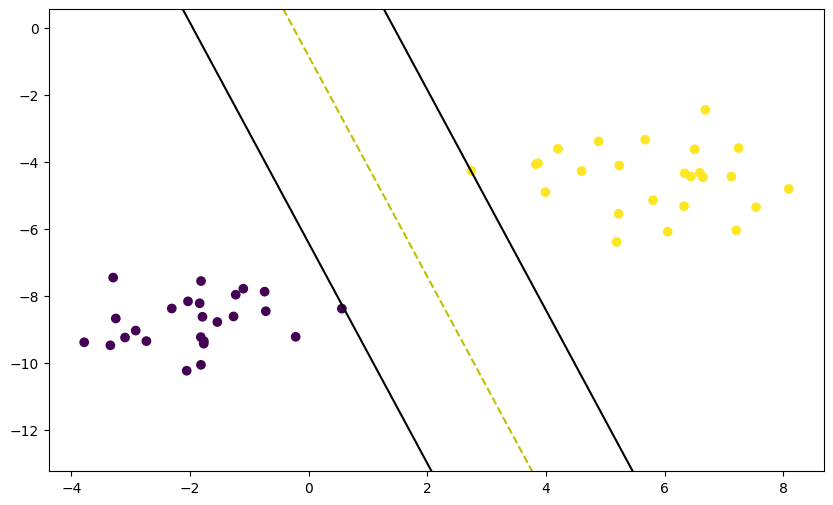

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Example usage
if __name__ == "__main__":
    # Generate linearly separable data (for simplicity)
    from sklearn.datasets import make_blobs
    X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
    y = np.where(y == 0, -1, 1)

    # Train the SVM
    clf = LinearSVM()
    clf.fit(X, y)

    # Predictions
    predictions = clf.predict(X)

    # Plotting
    def visualize_svm():
         def get_hyperplane_value(x, w, b, offset):
              return (-w[0] * x + b + offset) / w[1]

         fig, ax = plt.subplots(1, 1, figsize=(10,6))
         plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

         x0_1 = np.amin(X[:, 0])
         x0_2 = np.amax(X[:, 0])

         x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
         x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

         x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
         x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

         x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
         x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

         ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
         ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
         ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

         x1_min = np.amin(X[:, 1])
         x1_max = np.amax(X[:, 1])
         ax.set_ylim([x1_min-3,x1_max+3])

         plt.show()

    visualize_svm()
